In [116]:
import os

In [117]:
import pandas as pd
import numpy as np

In [237]:
METHODS = ['default', 'ror','uniform','nri_uniform','var']
DATA_LBP_PATH = 'dataset/fish_data_lbp/resize/'
DATA_HOG_PATH = 'dataset/fish_data_hog'
DATA_HL_PATH = 'dataset/fish_data_houghline'
METHOD_INDEX = 4


In [256]:
# df = pd.read_csv(os.path.join(DATA_LBP_PATH,METHODS[METHOD_INDEX],METHODS[METHOD_INDEX]+'_dense_radius_is_1.csv'), header=None)
df = pd.read_csv(os.path.join(DATA_HOG_PATH,'hog_fish.csv'), header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764
0,1,A73EGS-P,1,0.039008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,A73EGS-P,2,0.027035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.402458,0.252968,0.402458,0.301150,0.402458,0.036988,0.329734,0.295521,0.402458
2,3,A73EGS-P,3,0.025006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,A73EGS-P,4,0.035968,0.414215,0.414215,0.414215,0.351986,0.414215,0.120783,...,0.082304,0.432131,0.430995,0.432131,0.112794,0.432131,0.186883,0.432131,0.046721,0.132146
4,5,A73EGS-P,5,0.027966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,A73EGS-P,6,0.032001,0.401761,0.125557,0.401761,0.125557,0.401761,0.401761,...,0.000000,0.526888,0.000000,0.456013,0.120170,0.526888,0.120170,0.456013,0.000000,0.000000
6,7,A73EGS-P,7,0.035001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,acanthaluteres_brownii,1,0.025000,0.446425,0.411431,0.446425,0.235103,0.446425,0.083122,...,0.386499,0.376669,0.144562,0.327824,0.376669,0.156876,0.376669,0.370978,0.376669,0.376669
8,9,acanthaluteres_brownii,2,0.033000,0.444278,0.316934,0.392861,0.056470,0.444278,0.112940,...,0.000000,0.601388,0.199759,0.084226,0.000000,0.238227,0.066586,0.601388,0.399518,0.094167
9,10,acanthaluteres_brownii,3,0.029996,0.342638,0.342638,0.246561,0.342638,0.342638,0.342638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [257]:
df = df.groupby(1).filter(lambda x: len(x) > 10)
print(len(df[1].unique()))
df.head()

166


,0,1,2,3,4,5,6,7,8,9,...,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764
39,40,acanthopagrus_berda,1,0.032001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,41,acanthopagrus_berda,10,0.025999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.095901,0.121521,0.100601,0.060656,0.101919,0.310472,0.523189,0.523189,0.523189,0.208503
41,42,acanthopagrus_berda,11,0.033001,0.495169,0.257688,0.495169,0.311057,0.495169,0.128844,...,0.094330,0.395149,0.399643,0.135572,0.141590,0.178434,0.367059,0.399643,0.399643,0.399643
42,43,acanthopagrus_berda,2,0.030997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43,44,acanthopagrus_berda,3,0.028082,0.543312,0.000000,0.103781,0.000000,0.543312,0.543312,...,0.325481,0.569536,0.137569,0.049479,0.075907,0.161497,0.058711,0.174012,0.514114,0.569536


In [258]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(df[1].unique())

LabelBinarizer()

In [259]:
new_class = lb.transform(df[1])
new_class.shape

(2475, 166)

In [260]:
index_input =[i for i in range(4,len(df.columns))]
index_class = 'class_idx'
index_combine = index_input.copy()
index_combine.append(index_class)

In [261]:
df[index_input].to_numpy()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.52318879, 0.52318879,
        0.20850258],
       [0.49516857, 0.25768802, 0.49516857, ..., 0.39964312, 0.39964312,
        0.39964312],
       ...,
       [0.76652687, 0.        , 0.35623524, ..., 0.43754405, 0.17295449,
        0.        ],
       [0.49458758, 0.08670839, 0.49458758, ..., 0.22316091, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.3992809 , 0.3992809 ,
        0.34876334]])

In [262]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [263]:
X_train, X_test, y_train, y_test = train_test_split(df[index_input].copy().to_numpy(), new_class, 
                                                    test_size=0.333,random_state=1,stratify=new_class)

In [264]:
clf = MLPClassifier(hidden_layer_sizes=(200,220,238,204,146),solver='adam',random_state=None,n_iter_no_change=100, max_iter=1000, learning_rate_init=0.001).fit(X_train, y_train)

In [271]:
import matplotlib.pyplot as plt


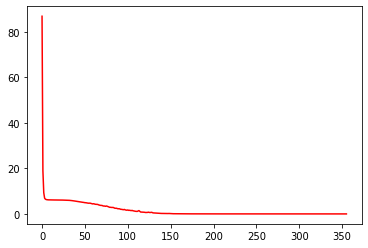

In [272]:
plt.plot(clf.loss_curve_, 'r')
plt.show()

In [273]:
clf.predict_proba(X_test)

array([[9.46102506e-45, 3.73317379e-14, 1.48674179e-49, ...,
        2.56704903e-25, 1.06048595e-37, 3.42932101e-27],
       [3.10412079e-25, 2.99567522e-40, 9.01026691e-26, ...,
        7.24909615e-31, 1.04546917e-41, 6.40435077e-13],
       [7.59682673e-38, 2.65771365e-65, 9.12370607e-70, ...,
        9.16684596e-43, 2.42842891e-62, 4.72882567e-32],
       ...,
       [3.91937836e-25, 5.01010099e-19, 1.56279323e-32, ...,
        9.20450793e-33, 3.83103527e-17, 1.02690320e-33],
       [6.43319779e-32, 9.80259147e-06, 1.23967187e-19, ...,
        2.85704647e-29, 3.38831346e-15, 2.53768224e-22],
       [5.98889162e-07, 2.34384283e-28, 1.22651212e-11, ...,
        1.28029454e-27, 1.22166796e-24, 1.16988837e-17]])

In [274]:
y_test_pred = clf.predict_log_proba(X_test)
y_test_pred

array([[-101.36914845,  -30.91893255, -112.43008255, ...,  -56.62187032,
         -85.1369212 ,  -60.93743523],
       [ -56.43189681,  -91.00623406,  -57.66884772, ...,  -69.39926109,
         -94.36152306,  -28.07662864],
       [ -85.47050291, -148.69056482, -158.97008042, ...,  -96.79556572,
        -141.87303126,  -72.12904608],
       ...,
       [ -56.19869426,  -42.13766069,  -73.23624822, ...,  -73.76561471,
         -37.80081151,  -75.95876039],
       [ -71.82125124,  -11.53286377,  -43.53427004, ...,  -65.72517931,
         -33.3184441 ,  -49.72562088],
       [ -14.32818929,  -63.62059078,  -25.12426156, ...,  -61.92270735,
         -55.06182513,  -38.98703825]])

In [275]:
clf.score(X_test, y_test)

0.11515151515151516

In [276]:
clf.predict_log_proba(X_test)

array([[-101.36914845,  -30.91893255, -112.43008255, ...,  -56.62187032,
         -85.1369212 ,  -60.93743523],
       [ -56.43189681,  -91.00623406,  -57.66884772, ...,  -69.39926109,
         -94.36152306,  -28.07662864],
       [ -85.47050291, -148.69056482, -158.97008042, ...,  -96.79556572,
        -141.87303126,  -72.12904608],
       ...,
       [ -56.19869426,  -42.13766069,  -73.23624822, ...,  -73.76561471,
         -37.80081151,  -75.95876039],
       [ -71.82125124,  -11.53286377,  -43.53427004, ...,  -65.72517931,
         -33.3184441 ,  -49.72562088],
       [ -14.32818929,  -63.62059078,  -25.12426156, ...,  -61.92270735,
         -55.06182513,  -38.98703825]])

In [253]:
from sklearn.metrics import confusion_matrix

In [254]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
cm = confusion_matrix(lb.inverse_transform(y_test_pred), lb.inverse_transform(y_test))
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [255]:
acc = accuracy(cm)
acc

0.07636363636363637